In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the classifiers we will be using
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

# Import train/test split function
from sklearn.model_selection import train_test_split

# Import cross validation scorer
from sklearn.model_selection import cross_val_score

# Import ROC AUC scoring function
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report

from scipy.stats import randint

from sklearn import preprocessing as pp

from imblearn.over_sampling import SMOTE 

In [2]:
def dummy_encode_column(data, colname):
    
    categorical_feature = data[colname]
    data_wd = data.drop(colname,axis=1)
    number_of_levels = len(categorical_feature.unique())
    
    dummy_encode_example = pd.get_dummies(categorical_feature, drop_first=True)
    dummy_encode_number_of_cols = dummy_encode_example.shape[1]
    
    dummy_encode_sample = dummy_encode_example
    print("There are %s total levels for the categorical variable %s." % (number_of_levels, colname))
    print("There are %s (n-1) columns in the dummy encoded dataframe." % dummy_encode_number_of_cols)
    data_wd = pd.concat([data_wd, dummy_encode_sample],axis=1)
    return data_wd

In [3]:
def rescaling_columns(data, colnames):
    
    scaler = pp.MinMaxScaler()
    rescaled_data = data[colnames]
    rescaled_data = scaler.fit_transform(rescaled_data)
    rescaled_data = pd.DataFrame(rescaled_data, columns=colnames)    
    
    return rescaled_data

In [4]:
def get_knn_parameters(x_train,y_train):
    parameter_space = [{"n_neighbors":[1,3,5,7,9,11]}]
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, parameter_space, cv=10)
    grid_search.fit(x_train, y_train)
    return grid_search

In [5]:
def get_knn_parameters(x_train,y_train):
    parameter_space = [{"n_neighbors":[1,3,5,7,9,11]}]
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, parameter_space, cv=10)
    grid_search.fit(x_train, y_train)
    return grid_search

In [6]:
def pre_processing_knn_crabs():
    crabs =  pd.read_csv('../data/crabs.csv')
    p_crabs = dummy_encode_column(crabs, 'sex')
    #p_crabs = p_crabs.drop(['M'], axis=1)
    p_crabs = dummy_encode_column(p_crabs, 'sp')
    p_crabs = p_crabs.drop('index',axis=1)
    p_crabs = rescaling_columns(p_crabs,p_crabs.columns)
    return p_crabs

In [7]:
def pre_processing_tree_crabs():
    crabs =  pd.read_csv('../data/crabs.csv')
    p_crabs = dummy_encode_column(crabs, 'sex')
    #p_crabs = crabs.drop(['sex'], axis=1)
    p_crabs = dummy_encode_column(p_crabs, 'sp')
    p_crabs = p_crabs.drop('index',axis=1)
    return p_crabs

In [8]:
def pre_processing_naive_crabs():
    crabs =  pd.read_csv('../data/crabs.csv')
    p_crabs = dummy_encode_column(crabs, 'sex')
    #p_crabs = p_crabs.drop(['M'], axis=1)
    p_crabs = dummy_encode_column(p_crabs, 'sp')
    p_crabs = p_crabs.drop('index',axis=1)
    return p_crabs

In [9]:
def pre_processing_knn_noshows():
    noshows =  pd.read_csv('../data/noshows.csv')
    p_noshows = noshows.drop(['PatientId', 'AppointmentID','ScheduledDay'],axis=1)
    p_noshows['AppointmentDay'] = p_noshows['AppointmentDay'].apply(lambda x: str(x).split("T")[0])
    p_noshows['AppointmentDay'] = p_noshows['AppointmentDay'].apply(lambda x: str(x).split("2016-")[1])
    p_noshows = dummy_encode_column(p_noshows, 'AppointmentDay')
    p_noshows = dummy_encode_column(p_noshows, 'Neighbourhood')
    p_noshows['No-show'] = p_noshows['No-show'].map({'Yes':1,'No':0})
    p_noshows['Gender'] = p_noshows['Gender'].map({'M':1,'F':0})
    return p_noshows

In [10]:
%matplotlib notebook
plt.style.use('seaborn')

## load data

In [11]:
crabs =  pd.read_csv('../data/crabs.csv')
crabs.shape

(200, 8)

In [12]:
crabs.head(3)

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7


In [13]:
noshows =  pd.read_csv('../data/noshows.csv')
noshows.shape

(110527, 14)

In [14]:
noshows.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


## 1 - Pre-processing

### 1.1 crabs

#### 1.1.1 knn

In [15]:
p_crabs_knn = pre_processing_knn_crabs()
p_crabs_knn.head(3)

There are 2 total levels for the categorical variable sex.
There are 1 (n-1) columns in the dummy encoded dataframe.
There are 2 total levels for the categorical variable sp.
There are 1 (n-1) columns in the dummy encoded dataframe.


,FL,RW,CL,CW,BD,M,O
0,0.056604,0.014599,0.042553,0.050667,0.058065,1.0,0.0
1,0.100629,0.087591,0.103343,0.098667,0.083871,1.0,0.0
2,0.125786,0.094891,0.130699,0.141333,0.103226,1.0,0.0


#### 1.1.2 Naïve Bayes

In [16]:
p_crabs_naive = pre_processing_naive_crabs()
p_crabs_naive.head(3)

There are 2 total levels for the categorical variable sex.
There are 1 (n-1) columns in the dummy encoded dataframe.
There are 2 total levels for the categorical variable sp.
There are 1 (n-1) columns in the dummy encoded dataframe.


,FL,RW,CL,CW,BD,M,O
0,8.1,6.7,16.1,19.0,7.0,1,0
1,8.8,7.7,18.1,20.8,7.4,1,0
2,9.2,7.8,19.0,22.4,7.7,1,0


#### 1.1.3 Decision Tree

In [17]:
p_crabs_tree = pre_processing_tree_crabs()
p_crabs_tree.head(3)

There are 2 total levels for the categorical variable sex.
There are 1 (n-1) columns in the dummy encoded dataframe.
There are 2 total levels for the categorical variable sp.
There are 1 (n-1) columns in the dummy encoded dataframe.


,FL,RW,CL,CW,BD,M,O
0,8.1,6.7,16.1,19.0,7.0,1,0
1,8.8,7.7,18.1,20.8,7.4,1,0
2,9.2,7.8,19.0,22.4,7.7,1,0


### 1.2 noshows

In [18]:
noshows = pre_processing_knn_noshows()
noshows.head(2)

There are 27 total levels for the categorical variable AppointmentDay.
There are 26 (n-1) columns in the dummy encoded dataframe.
There are 81 total levels for the categorical variable Neighbourhood.
There are 80 (n-1) columns in the dummy encoded dataframe.


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,05-02,...,SANTOS REIS,SAO BENEDITO,SAO CRISTOVAO,SAO JOSE,SAO PEDRO,SEGURANCA DO LAR,SOLON BORGES,TABUAZEIRO,UNIVERSITARIO,VILA RUBIM
0,0,62,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,56,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
noshows.columns

Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', '05-02',
       ...
       'SANTOS REIS', 'SAO BENEDITO', 'SAO CRISTOVAO', 'SAO JOSE', 'SAO PEDRO',
       'SEGURANCA DO LAR', 'SOLON BORGES', 'TABUAZEIRO', 'UNIVERSITARIO',
       'VILA RUBIM'],
      dtype='object', length=115)

In [20]:
f_noshows = noshows.drop(['No-show'], axis=1)
t_noshows = noshows['No-show']
t_noshows.value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [21]:
x_noshows_train, x_noshows_test, y_noshows_train, y_noshows_test = train_test_split(f_noshows, t_noshows, test_size=0.3, random_state=0)

In [22]:
aux = pd.concat([x_noshows_train, y_noshows_train], axis=1)

aux.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,05-02,05-03,...,SAO BENEDITO,SAO CRISTOVAO,SAO JOSE,SAO PEDRO,SEGURANCA DO LAR,SOLON BORGES,TABUAZEIRO,UNIVERSITARIO,VILA RUBIM,No-show
108316,0,29,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
104814,1,46,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
57895,0,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25669,1,12,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29717,0,26,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(x_noshows_train, y_noshows_train)

In [24]:
type(X_res)

numpy.ndarray

In [25]:
x_noshows_train_sm = pd.DataFrame(data=X_res[0:,0:], columns=x_noshows_train.columns)
y_noshows_train_sm = pd.DataFrame(data=y_res[0:],columns=['ns'])

In [26]:
aux_xpto = pd.concat([x_noshows_train_sm, y_noshows_train], axis=1)

In [27]:
aux_xpto.to_csv("noshows_smote.csv", sep='\t', encoding='utf-8')

In [28]:
type(y_noshows_train_sm)

pandas.core.frame.DataFrame

## 2 - KNN
### 2.1 crabs.csv

In [29]:
f_crabs = p_crabs_knn.drop(['O'], axis=1)
t_crabs = p_crabs_knn['O']

In [30]:
x_crabs_train, x_crabs_test, y_crabs_train, y_crabs_test = train_test_split(f_crabs, t_crabs, test_size=0.3, random_state=0)

In [31]:
grid_search_1 = get_knn_parameters(x_crabs_train,y_crabs_train)

In [32]:
grid_search_1.best_params_

{'n_neighbors': 1}

In [33]:
x = grid_search_1.cv_results_['params']
x_array = []
for i, value in enumerate(x):
    x_array.append(value['n_neighbors'])
x_array

[1, 3, 5, 7, 9, 11]

In [34]:
y = grid_search_1.cv_results_['mean_test_score']
y

array([ 0.91428571,  0.86428571,  0.86428571,  0.8       ,  0.77857143,
        0.77857143])

<IPython.core.display.Javascript object>


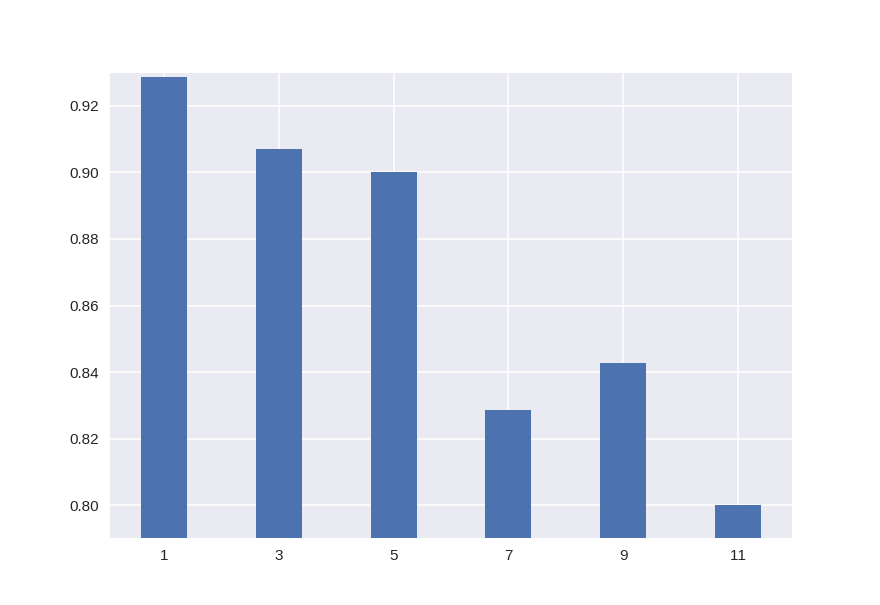

<Container object of 6 artists>

In [34]:
axes = plt.gca()
axes.set_ylim([0.79,0.93])
plt.xticks( x_array)
plt.bar(x_array,y)

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_crabs_train,y_crabs_train)
knn.score(x_crabs_test,y_crabs_test)

0.93333333333333335

## 3 - Naive Bayes
### 3.1 crabs.csv

In [72]:
f_crabs = p_crabs_naive.drop(['O'], axis=1)
t_crabs = p_crabs_naive['O']

In [73]:
x_crabs_train, x_crabs_test, y_crabs_train, y_crabs_test = train_test_split(f_crabs, t_crabs, test_size=0.3, random_state=0)

In [74]:
naive = GaussianNB()
naive.fit(x_crabs_train,y_crabs_train)
naive.score(x_crabs_test,y_crabs_test)

0.65000000000000002

In [77]:
naive = GaussianNB()
scores = cross_val_score(naive, f_crabs, t_crabs, cv=5)
scores.mean()

0.57499999999999996

## 4 - Decision Tree
### 4.1 crabs.csv

In [101]:
f_crabs = p_crabs_tree.drop(['O'], axis=1)
t_crabs = p_crabs_tree['O']

In [102]:
x_crabs_train, x_crabs_test, y_crabs_train, y_crabs_test = train_test_split(f_crabs, t_crabs, test_size=0.3, random_state=0)

In [107]:
tree_model = DecisionTreeClassifier()
parameter_space = [{'max_depth': [1,2,3,4,5], 'max_features': range(1, 6)}]
grid_search = GridSearchCV(tree_model, parameter_space, cv=5)
grid_search.fit(x_crabs_train, y_crabs_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': range(1, 6), 'max_depth': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [108]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 5}

In [110]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth=4, max_features=5)

# Fit the model
tree_model.fit(x_crabs_train, y_crabs_train)

# Make the predictions
y_pred = tree_model.predict_proba(x_crabs_test)

# Score the predictions
score = roc_auc_score(y_crabs_test, y_pred[:,1])
score

0.88209121245828692

In [112]:
tree.export_graphviz(tree_model,out_file='tree.dot',feature_names=['FL','RW','CL','CW','BD','M'])

## 5 - Neural Network
### 5.1 crabs.csv

,FL,RW,CL,CW,BD,M
131,18.0,13.4,36.7,41.3,17.1,1
96,16.7,16.1,36.6,41.9,15.4,0
181,18.8,15.2,35.8,40.5,16.6,0
19,13.9,11.1,29.2,33.3,12.1,1
153,12.6,11.5,25.0,28.1,11.5,0


NameError: name 'X_train' is not defined